In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#data 
cwd = os.getcwd()
#for train data
train_dir = os.path.join(cwd,"plates/train/")
train_cleaned_dir = os.path.join(train_dir, "cleaned")
train_dirty_dir = os.path.join(train_dir, "dirty")

#for test data
test_dir = os.path.join(cwd,"plates/train/")
test_cleaned_dir = os.path.join(train_dir, "cleaned")
test_dirty_dir = os.path.join(train_dir, "dirty")

In [63]:
#setting up 

batch_size = 3
epochs = 15
IMG_HEIGHT = 256
IMG_WIDTH = 314

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [64]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 39 images belonging to 3 classes.


In [71]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                             shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 39 images belonging to 3 classes.


In [72]:
sample_training_images, _ = next(train_data_gen)

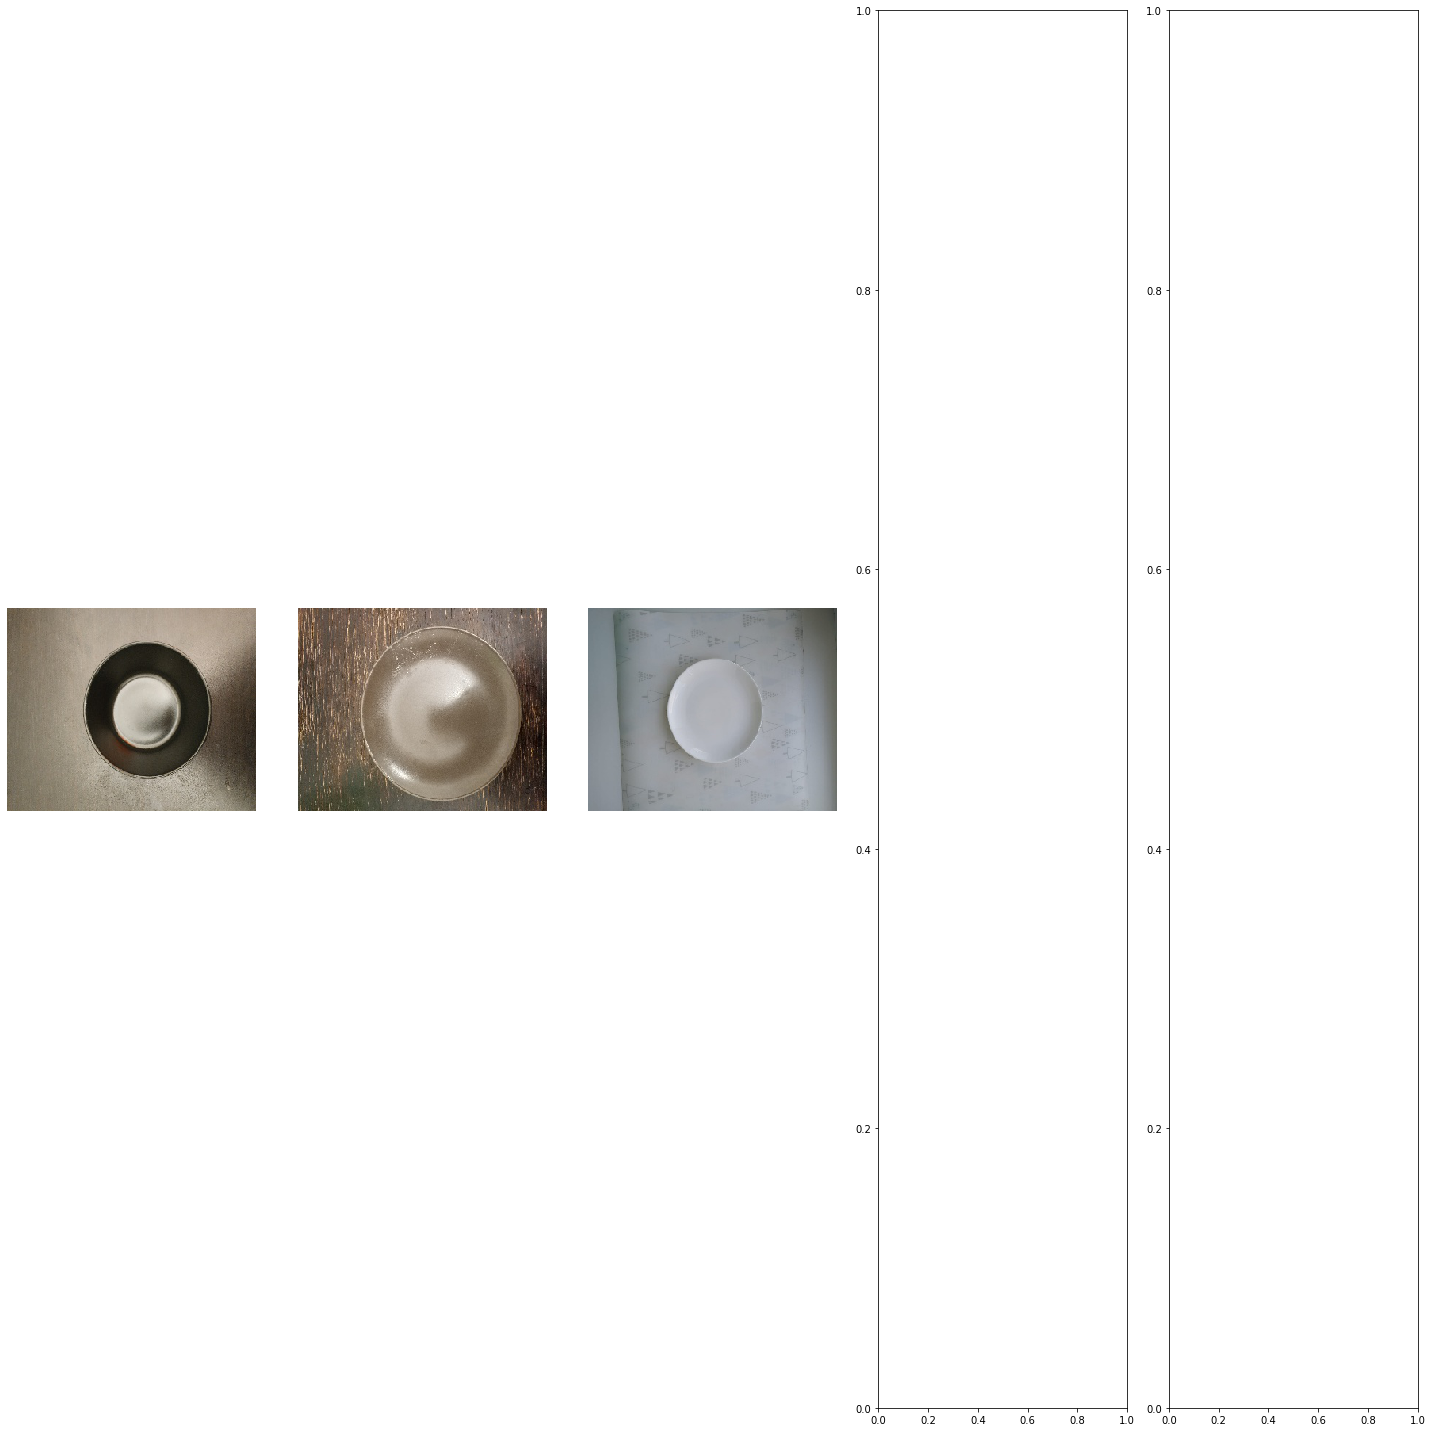

In [73]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

In [74]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 314, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 157, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 157, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 78, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 39, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 79872)            

In [76]:
total_train = 39
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_train // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 13 steps
Epoch 1/15
13/13 [==============================] - 8s 596ms/step - loss: -1335.3696 - accuracy: 0.4872 - val_loss: -5777.8316 - val_accuracy: 0.5128
Epoch 2/15
13/13 [==============================] - 6s 486ms/step - loss: -31870.1698 - accuracy: 0.5128 - val_loss: -97310.7608 - val_accuracy: 0.5128
Epoch 3/15
13/13 [==============================] - 6s 491ms/step - loss: -301955.9681 - accuracy: 0.5128 - val_loss: -809965.6562 - val_accuracy: 0.5128
Epoch 4/15
13/13 [==============================] - 7s 516ms/step - loss: -1786576.7981 - accuracy: 0.5128 - val_loss: -4142868.2692 - val_accuracy: 0.5128
Epoch 5/15
13/13 [==============================] - 7s 501ms/step - loss: -9037333.5962 - accuracy: 0.5128 - val_loss: -16249015.5385 - val_accuracy: 0.5128
Epoch 6/15
13/13 [==============================] - 6s 492ms/step - loss: -30028897.5385 - accuracy: 0.5128 - val_loss: -51952073.3846 - va

NameError: name 'val_acc' is not defined

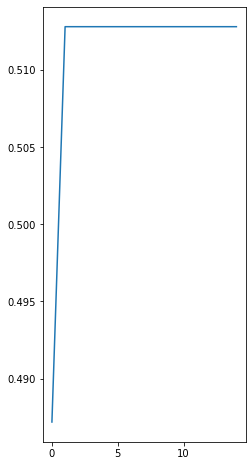